In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0


In [4]:
# Expand dimensions to fit CNN input shape
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9021 - loss: 0.3173 - val_accuracy: 0.9830 - val_loss: 0.0526
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9862 - loss: 0.0475 - val_accuracy: 0.9859 - val_loss: 0.0423
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9910 - loss: 0.0299 - val_accuracy: 0.9870 - val_loss: 0.0397
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9932 - loss: 0.0217 - val_accuracy: 0.9914 - val_loss: 0.0274
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9939 - loss: 0.0177 - val_accuracy: 0.9902 - val_loss: 0.0274


In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 2s - 8ms/step - accuracy: 0.9902 - loss: 0.0274

Test accuracy: 0.9902


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9019 - loss: 0.3196 - val_accuracy: 0.9816 - val_loss: 0.0591
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9857 - loss: 0.0452 - val_accuracy: 0.9900 - val_loss: 0.0304
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.9907 - loss: 0.0306 - val_accuracy: 0.9888 - val_loss: 0.0352
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9931 - loss: 0.0218 - val_accuracy: 0.9891 - val_loss: 0.0346
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9888 - val_loss: 0.0353
313/313 - 2s - 8ms/step - accuracy: 0.9888 - loss: 0.0353

Test accuracy: 0.9888


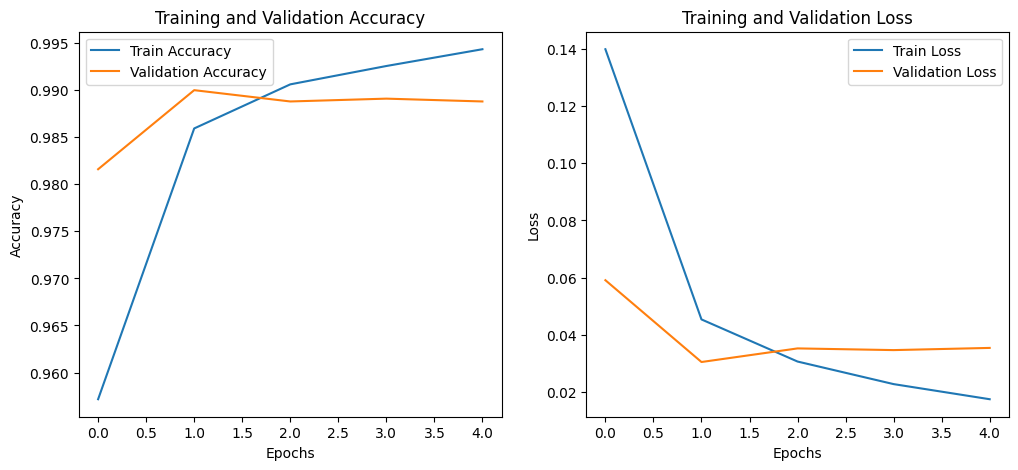

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to fit CNN input shape
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
